In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
import numpy as np

In [2]:
def thomsen_delta(x, z):
    return ((z/x) - 1)
def percentage(x):
    return (x*100)
def v_interval_correction(z, x):
    return ((1 - x) * z)

In [3]:
#df = pd.read_csv(r"C:/Users/BUYPC COMPUTERS/Documents/Programming/Data/Modified Data/Anisotropy_1.csv", sep="\t")
df = pd.read_csv('C:/Users/BUYPC COMPUTERS/Documents/Programming/Data/Modified Data/Anisotropy_1.txt', delim_whitespace = True, index_col = 'Marker')
#df = pd.DataFrame(data, columns = ["Marker"," Depth (m)", "Well(m/s)", "Seismic(m/s)", "Anisotropy (%)" ])
df = df.rename(columns = ({'Depth':'Depth (m)'}))
#df = df.rename(columns = ({'(m)':'Well (m/s)'}))
df = df.rename(columns = ({'Well':'Seismic (m/s)'}))
df = df.drop(df.loc[:, "(m/s)":"(m/s).1"].columns, axis = 1)
df.head()

,Depth (m),(m),Seismic (m/s)
Marker,,,
M4000,1350,2373,2449
M5000,1506,2479,2837
M6000,1620,2494,2784
M7000,1720,2543,2809
M8000,1778,2585,2853


In [4]:
l = list(df['Depth (m)'])
m = list(df['(m)'])
n = list(df['Seismic (m/s)'])
o = []
r = []
q = []

In [5]:
df.shape

(13, 3)

In [6]:
main_data = {
    "depth (m)": l, 
    "Vint_cks(m/s)": n,
    "Vint_seismic(m/s)": m,
    "Thomsen_delta": o,
    "Percentage": r,
    "V_interval_correction": q
}

In [7]:
for s, d in zip(n, m):
    a = np.round(thomsen_delta(s, d), 3)
    o.append(a)
    b = np.round(percentage(thomsen_delta(s, d)), 3)
    r.append(b)              
    c = np.round(v_interval_correction(d,thomsen_delta(s, d)), 3)
    q.append(c)
row_index = [1,2,3,4,5,6,7,8,9,10,11,12,13]
data_frame = pd.DataFrame(main_data, index=row_index)
#data_frame.to_csv("newfile.csv")
print(data_frame)

    Horizons  Vint_cks(m/s)  Vint_seismic(m/s)  Thomsen_delta  Percentage  \
1       1350           2449               2373         -0.031      -3.103   
2       1506           2837               2479         -0.126     -12.619   
3       1620           2784               2494         -0.104     -10.417   
4       1720           2809               2543         -0.095      -9.470   
5       1778           2853               2585         -0.094      -9.394   
6       1856           2844               2653         -0.067      -6.716   
7       1920           2831               2716         -0.041      -4.062   
8       2076           2921               2877         -0.015      -1.506   
9       2154           3003               2946         -0.019      -1.898   
10      2204           3053               2991         -0.020      -2.031   
11      2246           3094               3029         -0.021      -2.101   
12      2302           3146               3089         -0.018      -1.812   

In [8]:
data_frame.describe()

,Horizons,Vint_cks(m/s),Vint_seismic(m/s),Thomsen_delta,Percentage,V_interval_correction
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1929.692308,2908.076923,2764.692308,-0.050462,-5.046231,2896.455462
std,322.701974,193.635595,264.162634,0.041188,4.121006,199.413215
min,1350.000000,2449.000000,2373.000000,-0.126000,-12.619000,2446.641000
25%,1720.000000,2831.000000,2543.000000,-0.094000,-9.394000,2791.824000
50%,1920.000000,2853.000000,2716.000000,-0.031000,-3.103000,2831.173000
75%,2204.000000,3053.000000,2991.000000,-0.019000,-1.898000,3051.741000
max,2354.000000,3181.000000,3166.000000,-0.005000,-0.472000,3180.929000


#Relevant log plot for MX_1 (a), AX_1 (b) and MX_2 (c). Track 1: GR (black) and caliper logs (red); Track 2: sonic log 
#(cyan), checkshot (red) and seismic interval velocity (blue); Track 3: lithology derived from GR log.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

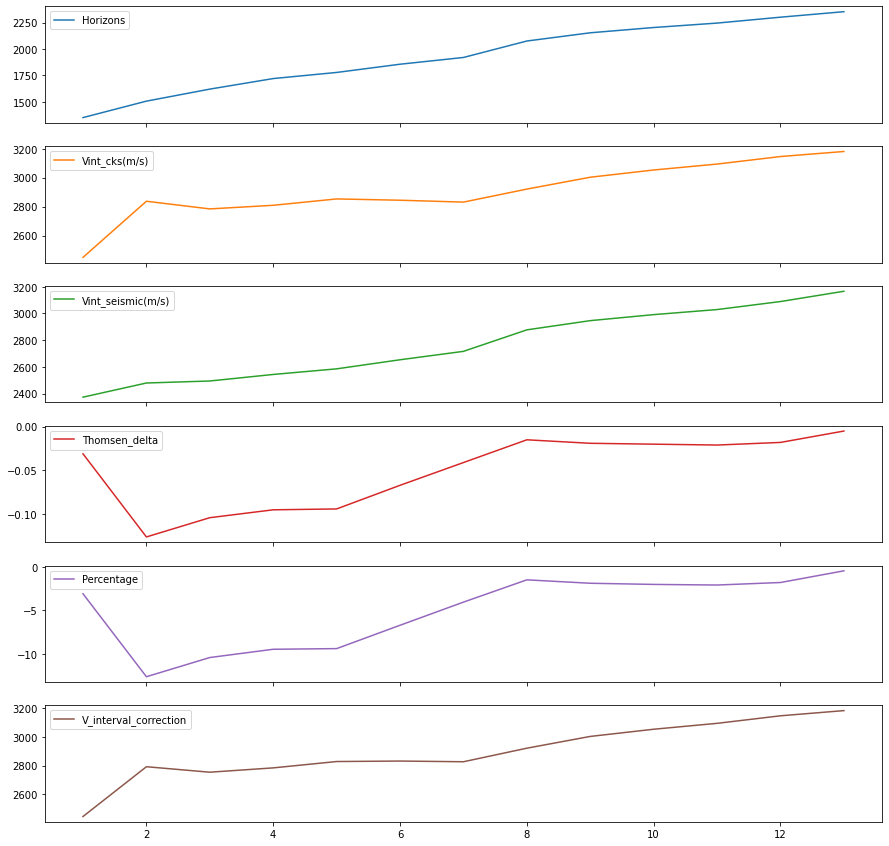

In [9]:
data_frame.plot(subplots = True, figsize = (15, 15))

<AxesSubplot:xlabel='Vint_cks(m/s)'>

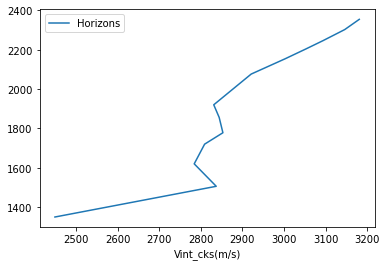

In [13]:
data_frame.plot("Vint_cks(m/s)", "Horizons")

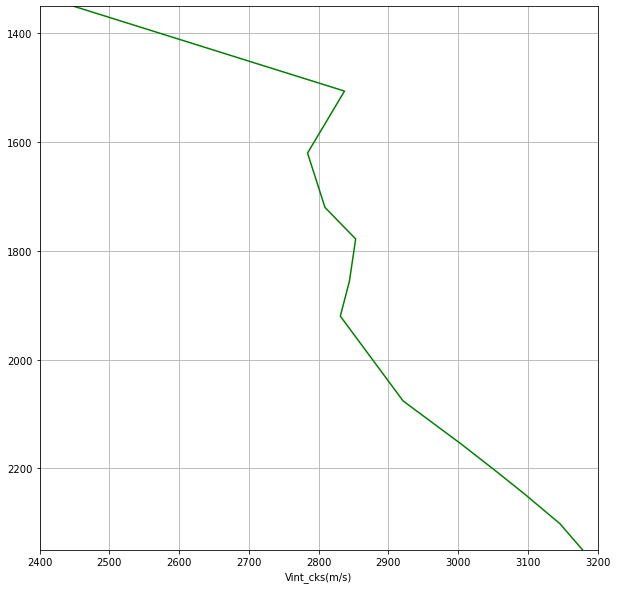

In [14]:
fig = plt.subplots(figsize = (10, 10))

ax1 = plt.subplot2grid((1, 1), (0, 0), rowspan = 1, colspan = 1)
ax1.plot("Vint_cks(m/s)", "Horizons", data = data_frame, color = "green")
ax1.set_xlabel("Vint_cks(m/s)")
ax1.set_xlim(2400, 3200)
ax1.set_ylim(2350, 1350)
ax1.grid()

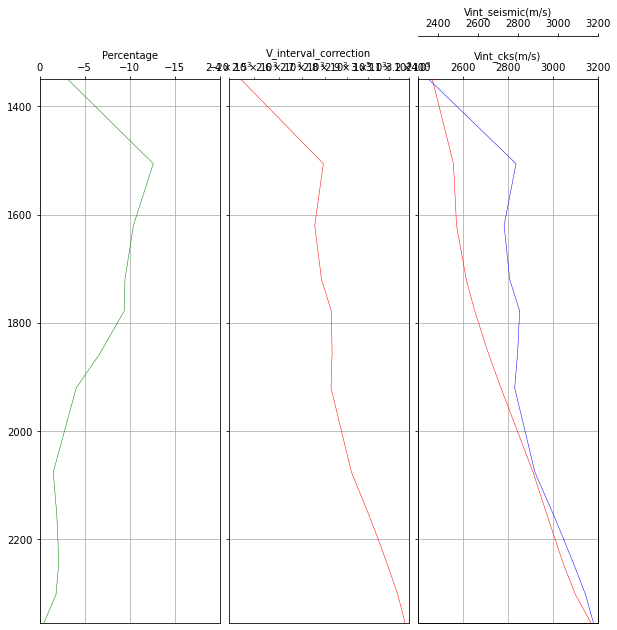

In [16]:
fig, axes = plt.subplots(figsize = (10, 10))
curve_names = ["Percentage","V_interval_correction","Vint_cks(m/s)", "Vint_seismic(m/s)" ]

ax1 = plt.subplot2grid((1, 3), (0, 0), rowspan = 1, colspan = 1)
ax2 = plt.subplot2grid((1, 3), (0, 1), rowspan = 1, colspan = 1)
ax3 = plt.subplot2grid((1, 3), (0, 2), rowspan = 1, colspan = 1)
ax4 = ax3.twiny()

ax1.plot("Percentage", "Horizons", data = data_frame, color = "green", lw = 0.5)
ax1.set_xlim(-0, -20)

ax2.plot("V_interval_correction", "Horizons", data = data_frame, color = "red", lw = 0.5)
ax2.set_xlim(2400, 3200)
ax2.semilogx()

ax3.plot("Vint_cks(m/s)", "Horizons", data = data_frame, color = "blue", lw = 0.5)
ax3.set_xlim(2400, 3200)

ax4.plot("Vint_seismic(m/s)", "Horizons", data = data_frame, color = "red", lw = 0.5)
ax4.set_xlim(2300, 3200)


for i, ax in enumerate(fig.axes):
    ax.set_ylim(2354, 1350)
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i == 3:
        ax.spines["top"].set_position(("axes", 1.08))
    else:
        ax.grid()
        
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
fig.subplots_adjust(wspace = 0.05)

In [ ]:
# Create the figure and subplots
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
        
#1st track: GR, CALI, SP track
    
#    ax01=ax[0].twiny()
#    ax01.set_xlim(-100,10)
#    ax01.spines['top'].set_position(('outward',0))
#    ax01.set_xlabel("SP [mV]")
#    ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='blue')
#    ax01.set_xlabel('SP[mV]',color='blue')    
#    ax01.tick_params(axis='x', colors='blue')
#    ax01.grid(True)
    
    
#    ax02=ax[0].twiny()
#    ax02.set_xlim(6,36)
#    ax02.plot(logs.CALI, logs.DEPT, '--', label='CALN[in]', color='black') 
#    ax02.spines['top'].set_position(('outward',40))
#    ax02.set_xlabel('CALI[in]',color='black')    
#    ax02.tick_params(axis='x', colors='black')
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.DEPT, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')
    
#2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.2,200)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[m.ohm]', color='red')
    ax11.plot(logs.ILD, logs.DEPT, label='ILD[m.ohm]', color='red')
    ax11.tick_params(axis='x', colors='red')    
    
#    ax12=ax[1].twiny()
#    ax12.set_xlim(0.1,100)
#    ax12.set_xscale('log')
#    ax12.plot(logs.ILM, logs.DEPT, label='ILM[m.ohm]', color='purple') 
#    ax12.spines['top'].set_position(('outward',40))
#    ax12.set_xlabel('ILM[m.ohm]', color='purple')    
#    ax12.tick_params(axis='x', colors='purple')
    
        
#    ax13=ax[1].twiny()
#    ax13.set_xlim(0.1,100)
#    ax13.set_xscale('log')
#    ax13.plot(logs.LL8, logs.DEPT, '--',label='LL8[m.ohm]', color='black') 
#    ax13.spines['top'].set_position(('outward',0))
#    ax13.set_xlabel('LL8[m.ohm]',color='black')
#    ax13.tick_params(axis='x', colors='black')

    
#3rd track: RHOB, NPHI track
    
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(140,40)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('DT[us/ft]')
    ax21.plot(logs.DT, logs.DEPT, label='DT[us/ft]', color='blue')
    ax21.set_xlabel('DT[us/ft]', color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(-15,45)
    ax22.invert_xaxis()
    ax22.plot(logs.NPHI, logs.DEPT, label='NPHI[%]', color='green') 
    ax22.spines['top'].set_position(('outward',40))
    ax22.set_xlabel('NPHI[%]', color='green')    
    ax22.tick_params(axis='x', colors='green')
    
    ax23=ax[2].twiny()
    ax23.set_xlim(1.95,2.95)
    ax23.plot(logs.RHOB, logs.DEPT ,label='RHOB[g/cc]', color='red') 
    ax23.spines['top'].set_position(('outward',80))
    ax23.set_xlabel('RHOB[g/cc]',color='red')
    ax23.tick_params(axis='x', colors='red')
    

#3rd track: DT track

    
    #plt.savefig ('triple_combo_plot.png', dpi=200, format='png')